# **Task 2: Predictive modeling of customer bookings**

---

## 1. Explore Data Analysis
- Importing the dataset
- Understanding the big picture
- Preparation
- Study of ralationship between variables

## 2. Predictive Models

---




## **1. Explore Data Analysis**

### - Importing the dataset

In [219]:
#import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [220]:
df = pd.read_csv(r'C:\Users\user\OneDrive\Máy tính\Personal Project\Brishtish Airway\Task 2 - Predicting customer buying behaviour\customer_booking.csv',\
                 encoding="ISO-8859-1")

### - Understanding the big picture

**Columns description**

There are 50000 rows and 14 columns in dataset
- `num_passengers`: dtype: int - context: number of passengers travelling
- `sales_channel`: dtype: category - context: sales channel booking was made on (Internet, Mobile)
- `trip_type`: dtype: category - context: type of trip (RoundTrip, OneWay, CircleTrip)
- `purchase_lead`: dtype: int - context: number of days between travel date and booking date
- `length_of_stay`: dtype: int - context: number of days spent at destination
- `flight_hour`: dtype: int - context: hour of flight departure (from 0 to 23)
- `flight_day`: dtype: category - context: day of week of flight departure (Monday to Sunday)
- `route`: dtype: category - context: from origin to destination flight route
- `booking_origin`: dtype: category - context: country from where booking was made
- `wants_extra_baggage`: dtype: category - context: if the customer wanted extra baggage in the booking (1 = yes, 0 = no)
- `wants_preferred_seat`: dtype: category - context: if the customer wanted a preferred seat in the booking(1 = yes, 0 = no)
- `wants_in_flight_meals`: dtype: category - context: if the customer wanted a in-flight meals in the booking (1 = yes, 0 = no)
- `flight_duration`: dtype: float - context: total duration of flight (in hours)
- `booking_complete`: dtype: category - context: flag indicating if the customer completed the booking (1 = yes, 0 = no)

In [221]:
df.head(n=10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


In [222]:
df.shape

(50000, 14)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [224]:
df.describe(include='all')

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000,50000,50000.000000,50000.00000,50000.00000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,NaN,2,3,NaN,NaN,NaN,7,799,104,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,Mon,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,44382,49497,NaN,NaN,NaN,8102,2680,17872,NaN,NaN,NaN,NaN,NaN
mean,1.591240,NaN,NaN,84.940480,23.04456,9.06634,NaN,NaN,NaN,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,NaN,NaN,90.451378,33.88767,5.41266,NaN,NaN,NaN,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,NaN,NaN,0.000000,0.00000,0.00000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,21.000000,5.00000,5.00000,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,51.000000,17.00000,9.00000,NaN,NaN,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,NaN,NaN,115.000000,28.00000,13.00000,NaN,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


### - Preparation (Clean Data)

In [225]:
#check missing values
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [226]:
#check duplicated rows
df.duplicated().sum()

719

In [227]:
#drop duplicated rows
df.drop_duplicates(inplace=True)

In [228]:
#df['purchase_lead'] = np.log10(df['purchase_lead'])

In [229]:
#checking outliers values
#using IQR method
def check_outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3 - q1
    lower_threshold = q1 - 1.5*IQR
    upper_threshold = q3 + 1.5*IQR
    boundaries = (lower_threshold, upper_threshold)
    outliers = (data < boundaries[0]) | (data > boundaries[1])
    return outliers

In [230]:
#outlier in purchase_lead column
outlier_purchase_lead_df = df.loc[check_outlier(df['purchase_lead']),:]
outlier_purchase_lead_df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0
12,4,Internet,RoundTrip,265,24,19,Mon,AKLDEL,New Zealand,1,0,1,5.52,0
16,1,Internet,RoundTrip,259,37,6,Sun,AKLDEL,India,0,0,0,5.52,0
19,1,Internet,RoundTrip,351,17,3,Sun,AKLHGH,China,0,0,0,5.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49955,2,Internet,RoundTrip,366,6,2,Tue,PENTPE,Malaysia,1,0,0,4.67,1
49967,3,Internet,RoundTrip,279,6,13,Fri,PENTPE,Malaysia,1,0,0,4.67,1
49973,2,Internet,RoundTrip,333,6,6,Thu,PENTPE,Malaysia,1,0,1,4.67,0
49975,1,Internet,RoundTrip,265,6,12,Tue,PENTPE,Taiwan,0,0,0,4.67,0


In [231]:
#handle outlier in purchase_lead column
#using capping method
capping_lower = df['purchase_lead'].quantile(0.05)
capping_upper = df['purchase_lead'].quantile(0.95)

df['purchase_lead'] = np.where(df['purchase_lead'] <= capping_lower, capping_lower,\
                               np.where(df['purchase_lead'] >= capping_upper, capping_upper,\
                               df['purchase_lead']))

In [232]:
#outlier in length_of_stay column
outlier_length_of_stay_df = df.loc[check_outlier(df['length_of_stay']),:]
outlier_length_of_stay_df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
18,1,Internet,RoundTrip,67.0,155,8,Sun,AKLDEL,New Zealand,1,0,0,5.52,0
21,1,Internet,RoundTrip,21.0,88,9,Wed,AKLICN,South Korea,1,0,1,6.62,0
31,2,Internet,RoundTrip,7.0,82,4,Thu,AKLICN,South Korea,1,0,1,6.62,0
41,1,Internet,RoundTrip,71.0,90,7,Thu,AKLICN,South Korea,1,1,1,6.62,0
43,1,Internet,RoundTrip,9.0,84,7,Wed,AKLICN,New Zealand,1,0,0,6.62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25575,2,Internet,RoundTrip,127.0,63,4,Sun,TRZWUH,India,1,1,1,5.13,0
25580,1,Internet,RoundTrip,129.0,63,15,Fri,TRZWUH,Taiwan,1,0,1,5.13,0
25581,1,Internet,RoundTrip,127.0,67,8,Sun,TRZWUH,China,1,0,1,5.13,0
25586,1,Internet,RoundTrip,129.0,63,17,Fri,TRZWUH,Taiwan,1,0,1,5.13,0


In [233]:
#handle outlier in length_of_stay column
#using capping method
capping_lower1 = df['length_of_stay'].quantile(0.05)
capping_upper1 = df['length_of_stay'].quantile(0.95)

df['length_of_stay'] = np.where(df['length_of_stay'] <= capping_lower1, capping_lower1,\
                               np.where(df['length_of_stay'] >= capping_upper1, capping_upper1,\
                               df['length_of_stay']))

In [234]:
df.loc[check_outlier(df['flight_duration']),:]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete


### - Study of ralationship between variables

*Univariate Analysis - Categorical Variabels*

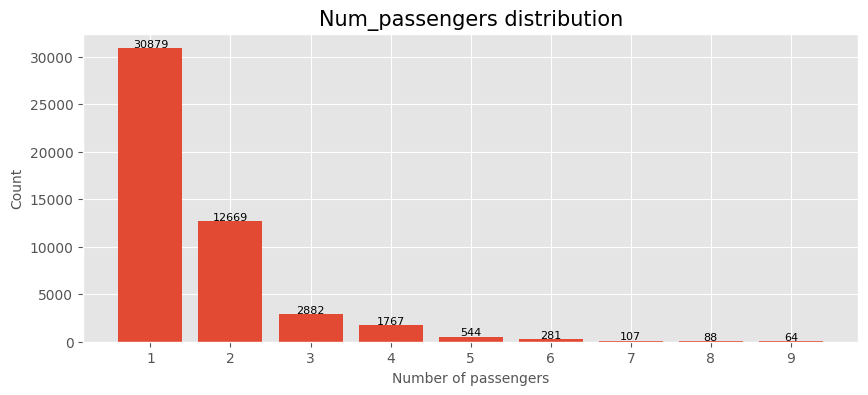

In [235]:
#num_passengers column
num_passengers = df['num_passengers'].value_counts(dropna=False).reset_index()

#visualize num_passengers dist
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(x=num_passengers['num_passengers'], height=num_passengers['count'])
plt.xticks(num_passengers['num_passengers'])
a = num_passengers['count'].values
for i, v in enumerate(a):
    plt.text(x=i+1, y=v+100, s=str(v), ha='center', fontsize=8)
ax.set_xlabel('Number of passengers', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Num_passengers distribution', fontsize=15)
plt.show()

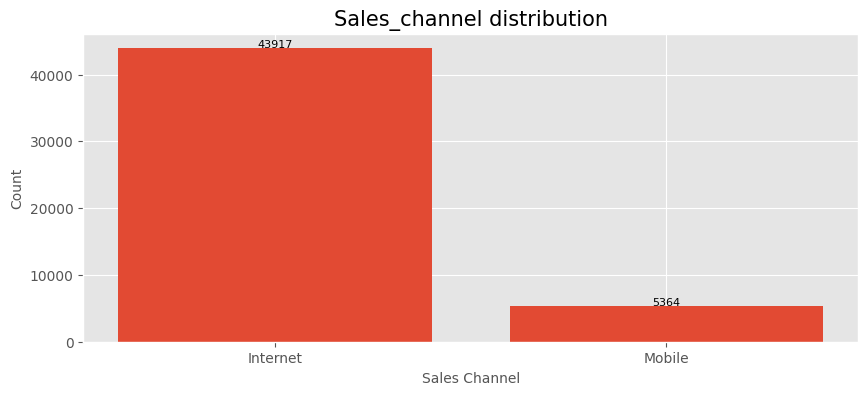

In [236]:
#sales_channel column
sales_channel = df['sales_channel'].value_counts(dropna=False).reset_index()

#visualize sales_channel distribution
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(x=sales_channel['sales_channel'], height=sales_channel['count'])
plt.xticks(sales_channel['sales_channel'])
b = sales_channel['count'].values
for i, v in enumerate(b):
    plt.text(x=i, y=v+100, s=str(v), ha='center', fontsize=8)
ax.set_xlabel('Sales Channel', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Sales_channel distribution', fontsize=15)
plt.show()


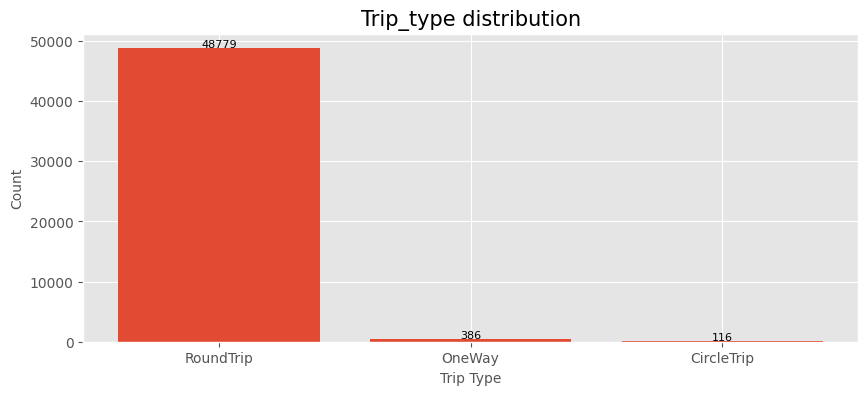

In [237]:
#trip_type column
trip_type = df['trip_type'].value_counts(dropna=False).reset_index()

#visualize trip_type distribution
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(x=trip_type['trip_type'], height=trip_type['count'])
plt.xticks(trip_type['trip_type'])
c = trip_type['count'].values
for i, v in enumerate(c):
    plt.text(x=i, y=v+100, s=str(v), ha='center', fontsize=8)
ax.set_xlabel('Trip Type', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Trip_type distribution', fontsize=15)
plt.show()

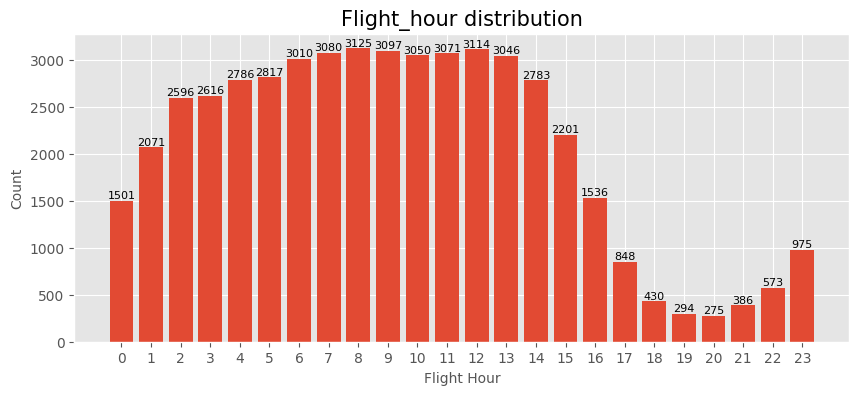

In [238]:
#flight_hour column
flight_hour = df['flight_hour'].value_counts(dropna=False).reset_index().sort_values('flight_hour')

#visualize flight_hour distribution
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(x=flight_hour['flight_hour'], height=flight_hour['count'])
plt.xticks(flight_hour['flight_hour'])
d = flight_hour['count'].values
for i, v in enumerate(d):
    plt.text(x=i, y=v+25, s=str(v), ha='center', fontsize=8)
ax.set_xlabel('Flight Hour', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Flight_hour distribution', fontsize=15)
plt.show()

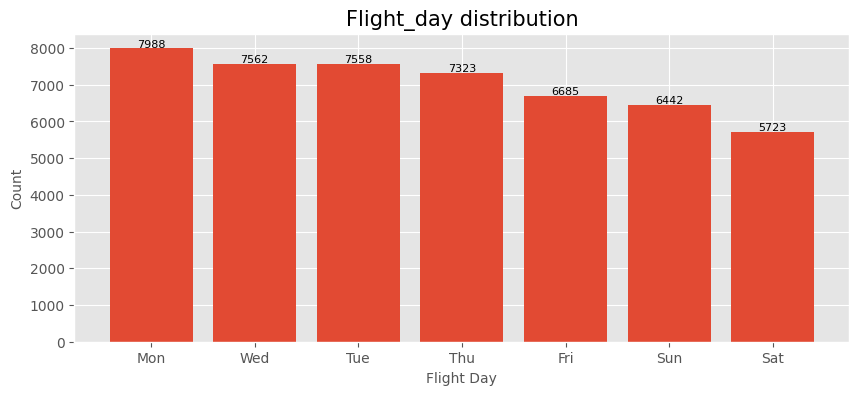

In [239]:
#flight_day column
flight_day = df['flight_day'].value_counts(dropna=False).reset_index()

#visualize flight_day distribution
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(x=flight_day['flight_day'], height=flight_day['count'])
plt.xticks(flight_day['flight_day'])
e = flight_day['count'].values
for i, v in enumerate(e):
    plt.text(x=i, y=v+40, s=str(v), ha='center', fontsize=8)
ax.set_xlabel('Flight Day', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Flight_day distribution', fontsize=15)
plt.show()

In [240]:
#pd.set_option('display.max_rows', None)
#booking_origin = df['booking_origin'].value_counts(dropna=False).reset_index()
#booking_origin

In [241]:
df['booking_origin'].replace('(not set)', 'Australia', inplace=True)

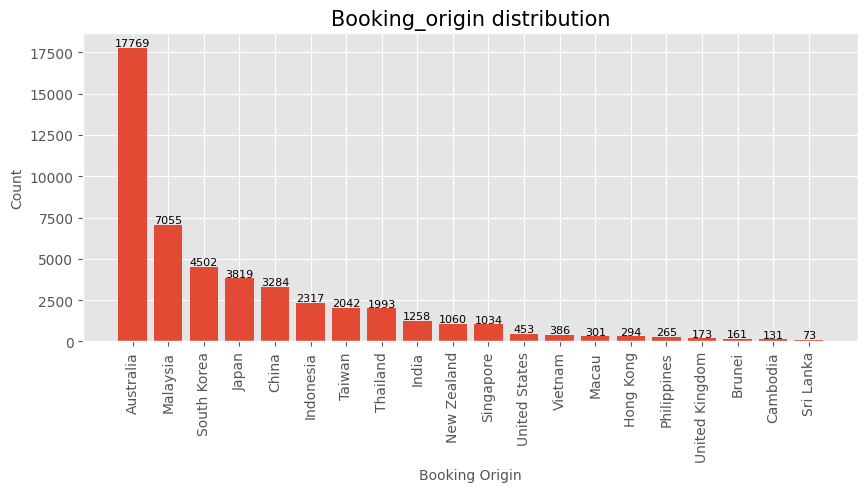

In [242]:
#booking_origin column
booking_origin = df['booking_origin'].value_counts(dropna=False).reset_index()[:20]

#visualize booking_origin distribution
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(x=booking_origin['booking_origin'], height=booking_origin['count'])
plt.xticks(booking_origin['booking_origin'])
f = booking_origin['count'].values
for i, v in enumerate(f):
    plt.text(x=i, y=v+100, s=str(v), ha='center', fontsize=8)
ax.set_xlabel('Booking Origin', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Booking_origin distribution', fontsize=15)
plt.xticks(rotation=90)
plt.show()

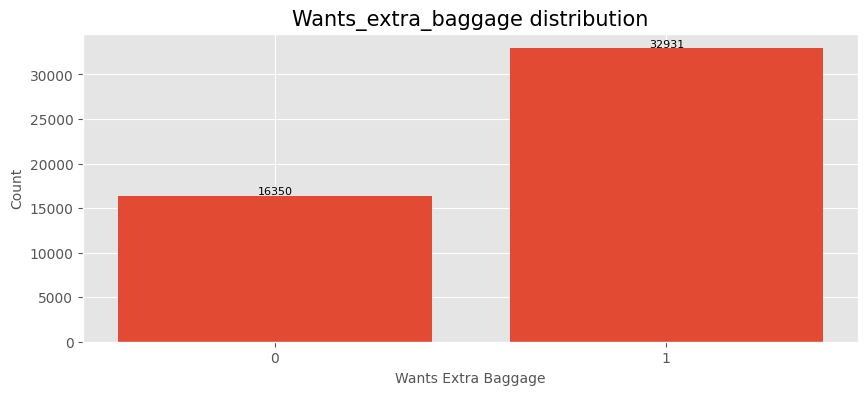

In [243]:
#wants_extra_baggage column
wants_extra_baggage = df['wants_extra_baggage'].value_counts(dropna=False).reset_index()\
                        .sort_values('wants_extra_baggage')

#visualize wants_extra_baggage distribution
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(x=wants_extra_baggage['wants_extra_baggage'], height=wants_extra_baggage['count'])
plt.xticks(wants_extra_baggage['wants_extra_baggage'])
g = wants_extra_baggage['count'].values
for i, v in enumerate(g):
    plt.text(x=i, y=v+150, s=str(v), ha='center', fontsize=8)
ax.set_xlabel('Wants Extra Baggage', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Wants_extra_baggage distribution', fontsize=15)
plt.show()

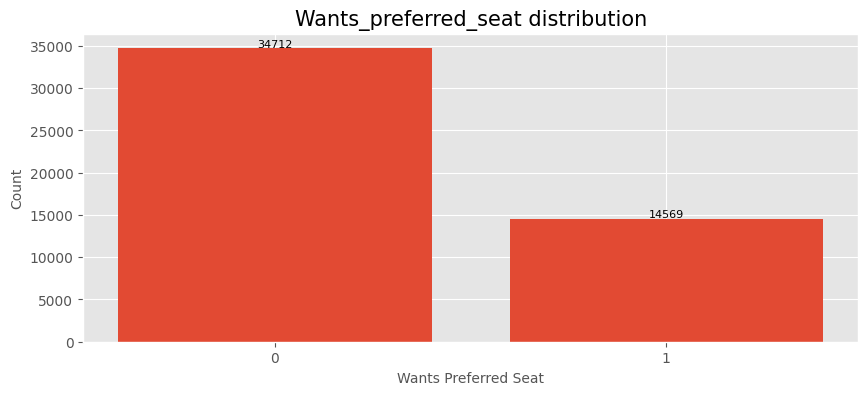

In [244]:
#wants_preferred_seat column
wants_preferred_seat = df['wants_preferred_seat'].value_counts(dropna=False).reset_index()\
                        .sort_values('wants_preferred_seat')

#visualize wants_preferred_seat distribution
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(x=wants_preferred_seat['wants_preferred_seat'], height=wants_preferred_seat['count'])
plt.xticks(wants_preferred_seat['wants_preferred_seat'])
h = wants_preferred_seat['count'].values
for i, v in enumerate(h):
    plt.text(x=i, y=v+150, s=str(v), ha='center', fontsize=8)
ax.set_xlabel('Wants Preferred Seat', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Wants_preferred_seat distribution', fontsize=15)
plt.show()

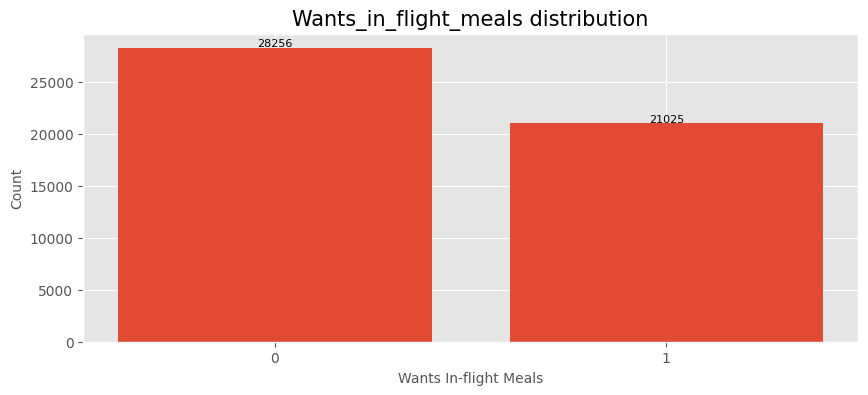

In [245]:
#wants_in_flight_meals column
wants_in_flight_meals = df['wants_in_flight_meals'].value_counts(dropna=False).reset_index()\
                        .sort_values('wants_in_flight_meals')

#visualize wants_in_flight_meals distribution
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(x=wants_in_flight_meals['wants_in_flight_meals'], height=wants_in_flight_meals['count'])
plt.xticks(wants_in_flight_meals['wants_in_flight_meals'])
k = wants_in_flight_meals['count'].values
for i, v in enumerate(k):
    plt.text(x=i, y=v+150, s=str(v), ha='center', fontsize=8)
ax.set_xlabel('Wants In-flight Meals', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Wants_in_flight_meals distribution', fontsize=15)
plt.show()

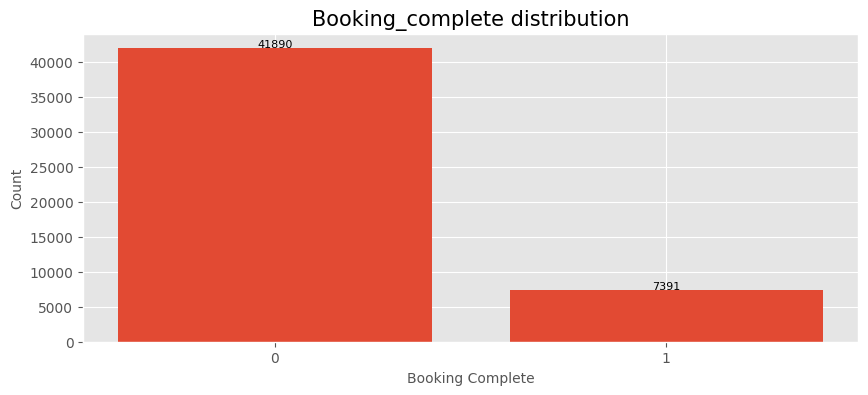

In [246]:
#booking_complete column
booking_complete = df['booking_complete'].value_counts(dropna=False).reset_index()\
                        .sort_values('booking_complete')

#visualize booking_complete distribution
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(x=booking_complete['booking_complete'], height=booking_complete['count'])
plt.xticks(booking_complete['booking_complete'])
g = booking_complete['count'].values
for i, v in enumerate(g):
    plt.text(x=i, y=v+150, s=str(v), ha='center', fontsize=8)
ax.set_xlabel('Booking Complete', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Booking_complete distribution', fontsize=15)
plt.show()

*Univariate Analysis - Numerical Variabels*

Text(0.5, 0, 'Purchase Lead')

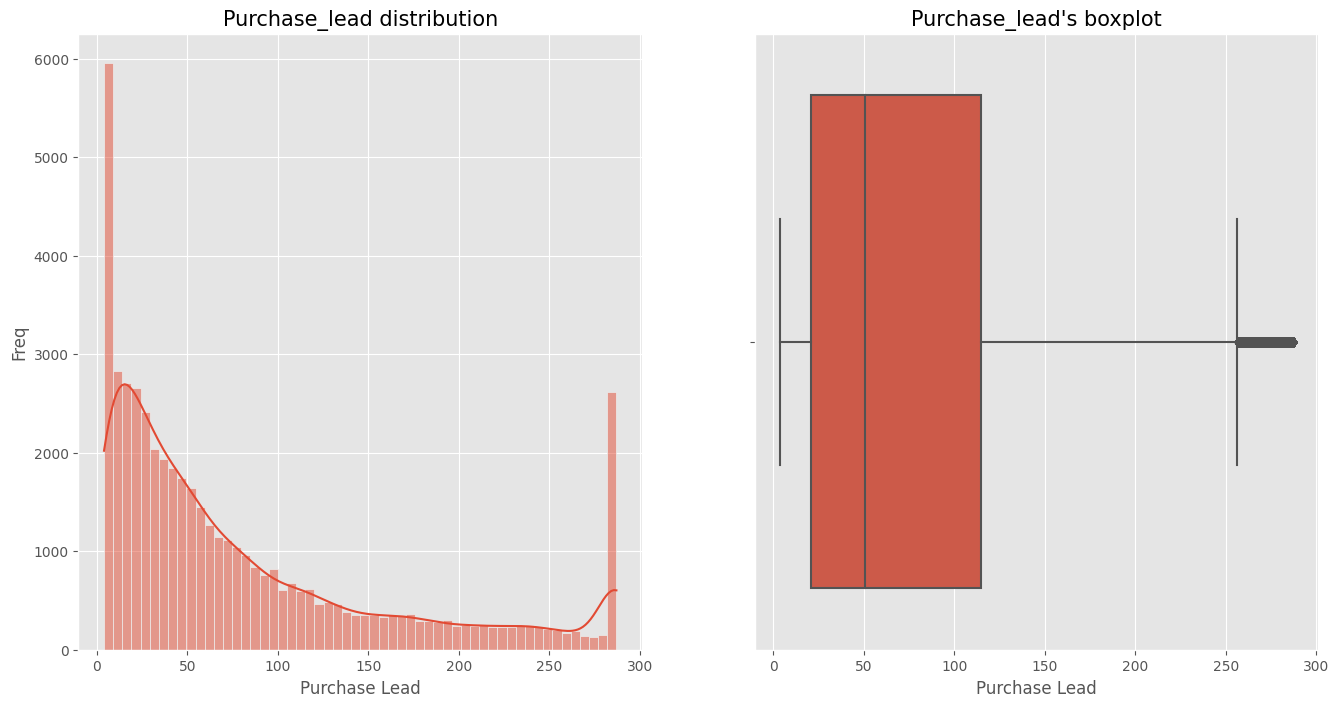

In [247]:
#purchase_lead column
fig, ax = plt.subplots(1, 2, figsize=(16,8))
g = sns.histplot(data=df, x='purchase_lead', kde=True, ax=ax[0])
g1 = sns.boxplot(data=df, x='purchase_lead', ax=ax[1])

g.set_title('Purchase_lead distribution', fontsize=15)
g.set_xlabel('Purchase Lead', fontsize=12)
g.set_ylabel('Freq', fontsize=12)

g1.set_title("Purchase_lead's boxplot", fontsize=15)
g1.set_xlabel('Purchase Lead', fontsize=12)


Text(0.5, 0, 'Length of stay')

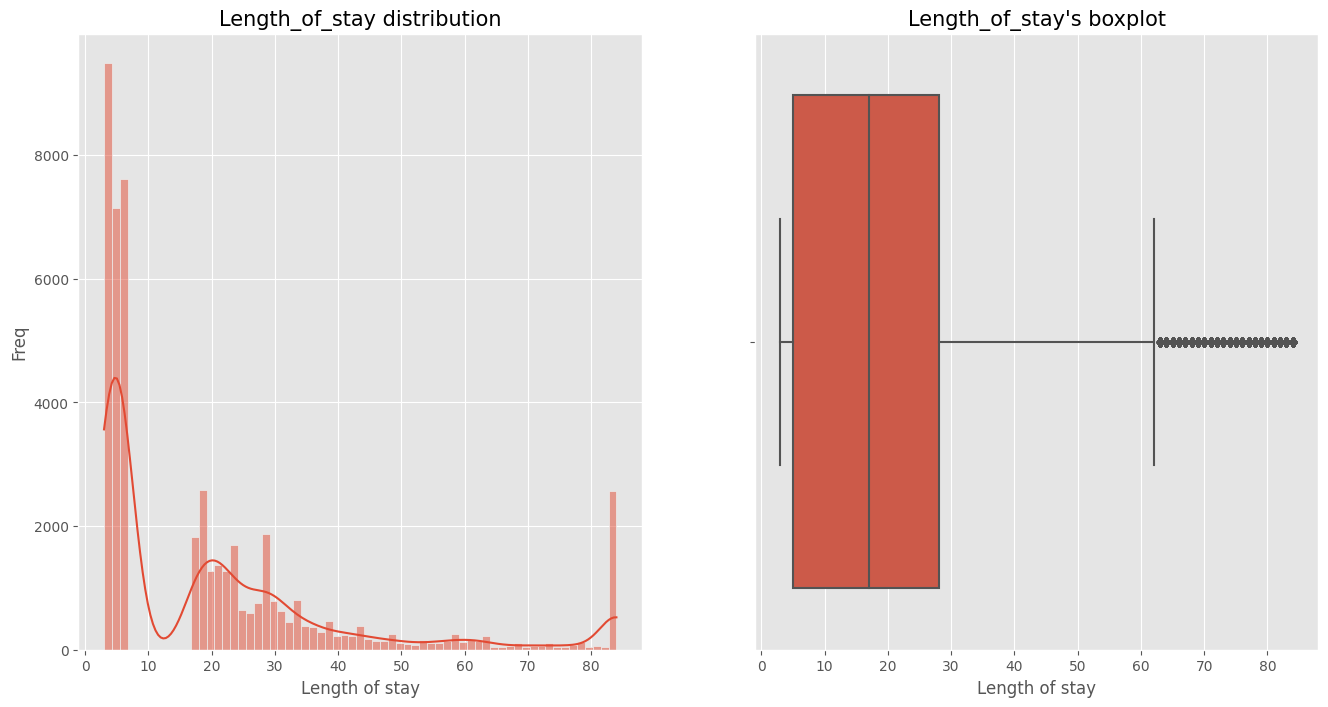

In [248]:
#length_of_stay column
fig, ax = plt.subplots(1, 2, figsize=(16,8))
g = sns.histplot(data=df, x='length_of_stay', kde=True, ax=ax[0])
g1 = sns.boxplot(data=df, x='length_of_stay', ax=ax[1])

g.set_title('Length_of_stay distribution', fontsize=15)
g.set_xlabel('Length of stay', fontsize=12)
g.set_ylabel('Freq', fontsize=12)

g1.set_title("Length_of_stay's boxplot", fontsize=15)
g1.set_xlabel('Length of stay', fontsize=12)

Text(0.5, 0, 'Flight Duration')

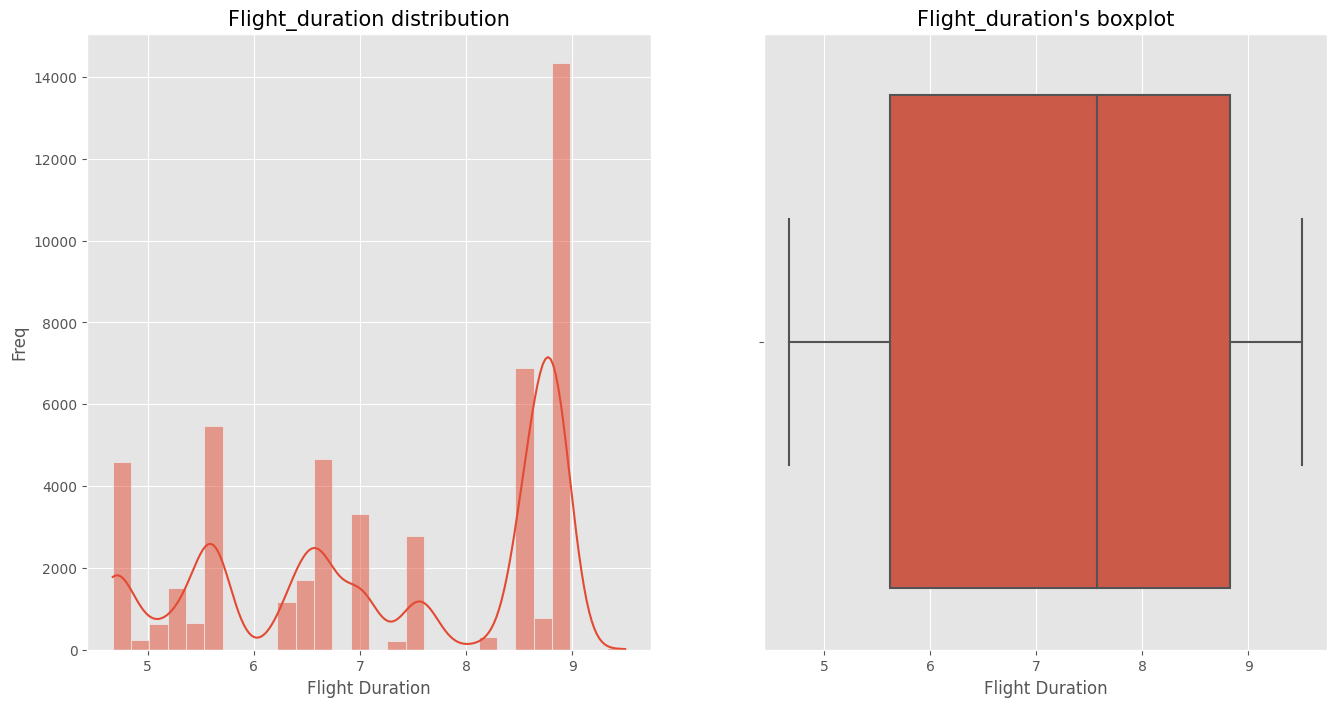

In [249]:
#flight_duration column
fig, ax = plt.subplots(1, 2, figsize=(16,8))
g = sns.histplot(data=df, x='flight_duration', kde=True, ax=ax[0])
g1 = sns.boxplot(data=df, x='flight_duration', ax=ax[1])

g.set_title('Flight_duration distribution', fontsize=15)
g.set_xlabel('Flight Duration', fontsize=12)
g.set_ylabel('Freq', fontsize=12)

g1.set_title("Flight_duration's boxplot", fontsize=15)
g1.set_xlabel('Flight Duration', fontsize=12)

*Bivariate Analysis - Two Categorical Variabels*

In [250]:
df.describe(include='all')

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281,49281,49281.000000,49281.000000,49281.000000,49281,49281,49281,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
unique,NaN,2,3,NaN,NaN,NaN,7,799,103,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,Mon,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,43917,48779,NaN,NaN,NaN,7988,2620,17769,NaN,NaN,NaN,NaN,NaN
mean,1.590187,NaN,NaN,81.714231,20.738358,9.070676,NaN,NaN,NaN,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,NaN,NaN,81.101132,21.795100,5.413099,NaN,NaN,NaN,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,NaN,NaN,4.000000,3.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,21.000000,5.000000,5.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,51.000000,17.000000,9.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,NaN,NaN,115.000000,28.000000,13.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


In [251]:
#convert dtype of sales_channel and trip_type column
df['sales_channel'] = df['sales_channel'].astype('category')
df['trip_type'] = df['trip_type'].astype('category')

In [252]:
sales_channel_and_trip_type_df = df.groupby(['sales_channel', 'trip_type'])['trip_type'].count()
sales_channel_and_trip_type_df = pd.DataFrame(sales_channel_and_trip_type_df)
sales_channel_and_trip_type_df = sales_channel_and_trip_type_df.unstack()
sales_channel_and_trip_type_df.columns = sales_channel_and_trip_type_df.columns.droplevel(0)
sales_channel_and_trip_type_df

trip_type,CircleTrip,OneWay,RoundTrip
sales_channel,,,
Internet,112,369,43436
Mobile,4,17,5343


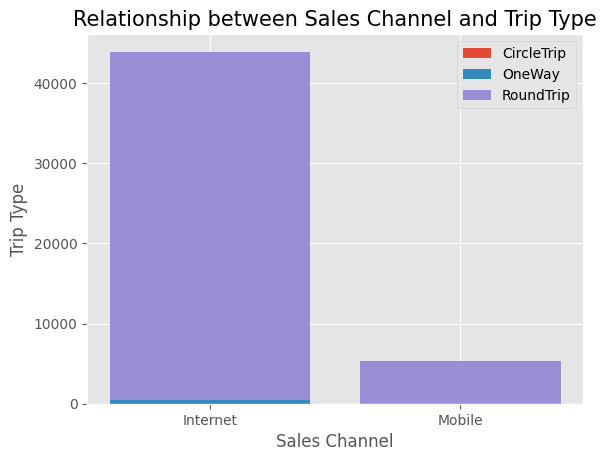

In [253]:
#visualize stacked bar
fig, ax = plt.subplots()
ax.bar(sales_channel_and_trip_type_df.index, sales_channel_and_trip_type_df['CircleTrip'], label='CircleTrip')
ax.bar(sales_channel_and_trip_type_df.index, sales_channel_and_trip_type_df['OneWay'], bottom=sales_channel_and_trip_type_df['CircleTrip'], label='OneWay')
ax.bar(sales_channel_and_trip_type_df.index, sales_channel_and_trip_type_df['RoundTrip'], bottom=sales_channel_and_trip_type_df['CircleTrip']+sales_channel_and_trip_type_df['OneWay'],label='RoundTrip')

ax.set_xlabel('Sales Channel', fontsize=12)
ax.set_ylabel('Trip Type', fontsize=12)
ax.set_title('Relationship between Sales Channel and Trip Type', fontsize=15)
ax.legend()

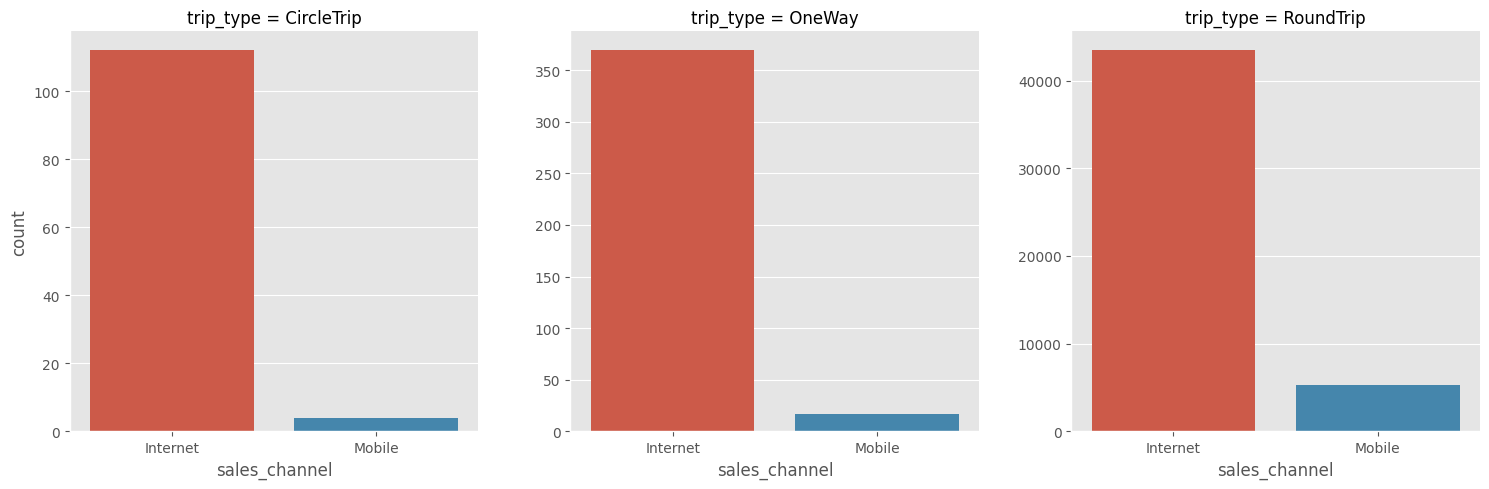

In [254]:
sns.catplot(data=df, x='sales_channel', col='trip_type', kind='count', sharey=False)

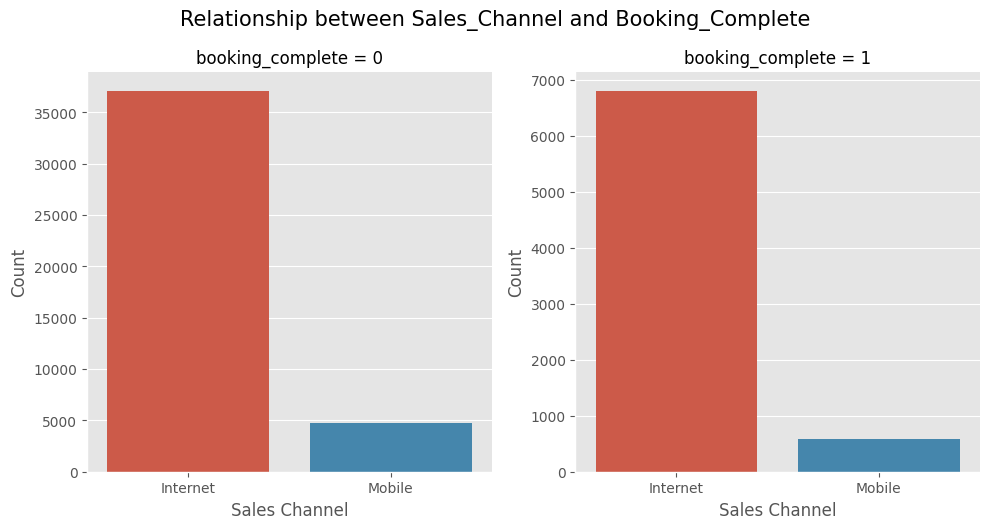

In [255]:
#visualize sales_channel and booking_complete
g = sns.catplot(data=df, x='sales_channel', col='booking_complete', kind='count', sharey=False)
g.fig.suptitle('Relationship between Sales_Channel and Booking_Complete', fontsize=15, y=1.05)
#g.set_titles('This is {col_name}', fontsize=12)
g.set(ylabel='Count', xlabel='Sales Channel')

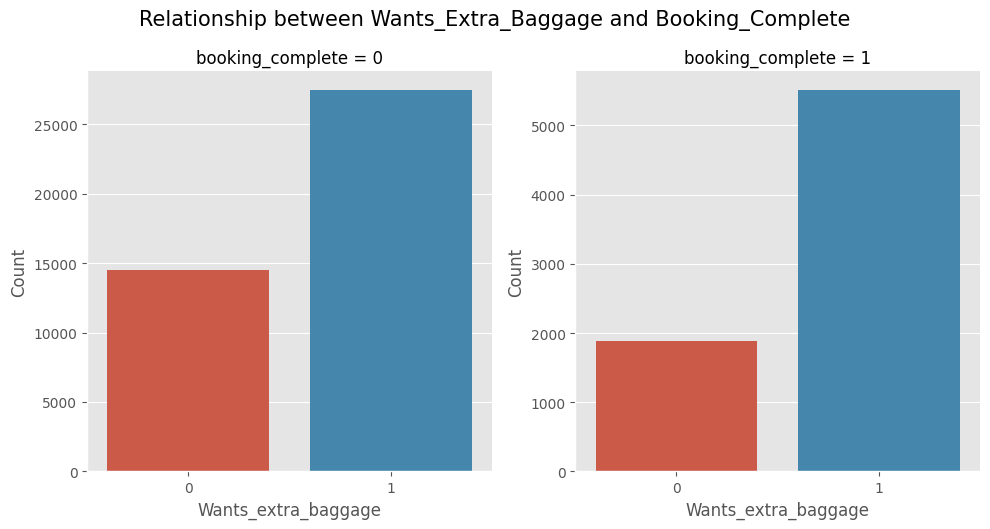

In [256]:
#visualize wants_extra_baggage and booking_complete
g = sns.catplot(data=df, x='wants_extra_baggage', col='booking_complete', kind='count', sharey=False)
g.fig.suptitle('Relationship between Wants_Extra_Baggage and Booking_Complete', fontsize=15, y=1.05)
#g.set_titles('This is {col_name}', fontsize=12)
g.set(ylabel='Count', xlabel='Wants_extra_baggage')

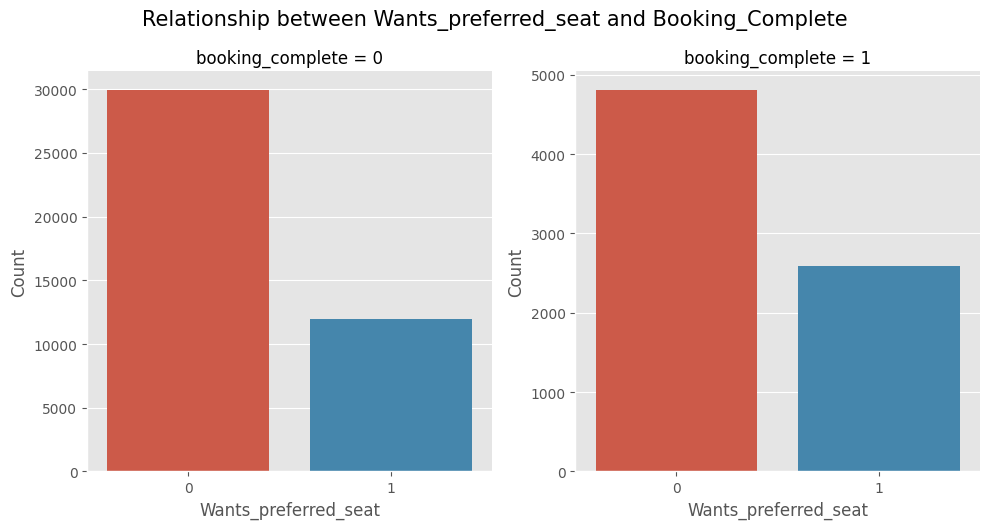

In [257]:
#visualize wants_preferred_seat and booking_complete
g = sns.catplot(data=df, x='wants_preferred_seat', col='booking_complete', kind='count', sharey=False)
g.fig.suptitle('Relationship between Wants_preferred_seat and Booking_Complete', fontsize=15, y=1.05)
#g.set_titles('This is {col_name}', fontsize=12)
g.set(ylabel='Count', xlabel='Wants_preferred_seat')

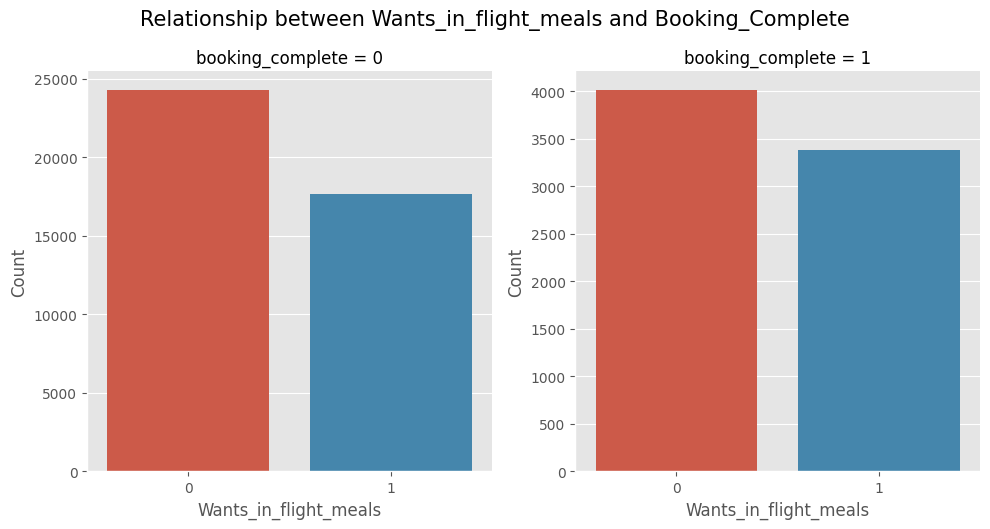

In [258]:
#visualieze wants_in_flight_meals and booking_complete
g = sns.catplot(data=df, x='wants_in_flight_meals', col='booking_complete', kind='count', sharey=False)
g.fig.suptitle('Relationship between Wants_in_flight_meals and Booking_Complete', fontsize=15, y=1.05)
#g.set_titles('This is {col_name}', fontsize=12)
g.set(ylabel='Count', xlabel='Wants_in_flight_meals')

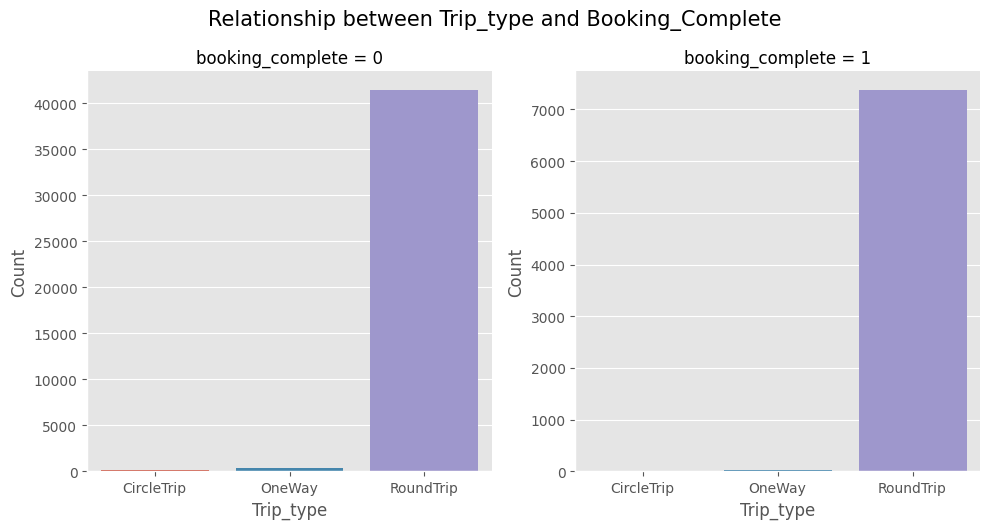

In [259]:
#visualize trip_type and booking_complete
g = sns.catplot(data=df, x='trip_type', col='booking_complete', kind='count', sharey=False)
g.fig.suptitle('Relationship between Trip_type and Booking_Complete', fontsize=15, y=1.05)
#g.set_titles('This is {col_name}', fontsize=12)
g.set(ylabel='Count', xlabel='Trip_type')

In [260]:
country = booking_origin['booking_origin'].tolist()
top20 = df['booking_origin'].isin(country)
df5 = df[top20]
df5

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262.0,19.0,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112.0,20.0,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243.0,22.0,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96.0,31.0,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68.0,22.0,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27.0,6.0,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111.0,6.0,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24.0,6.0,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15.0,6.0,11,Mon,PERPNH,Australia,1,0,1,5.62,0


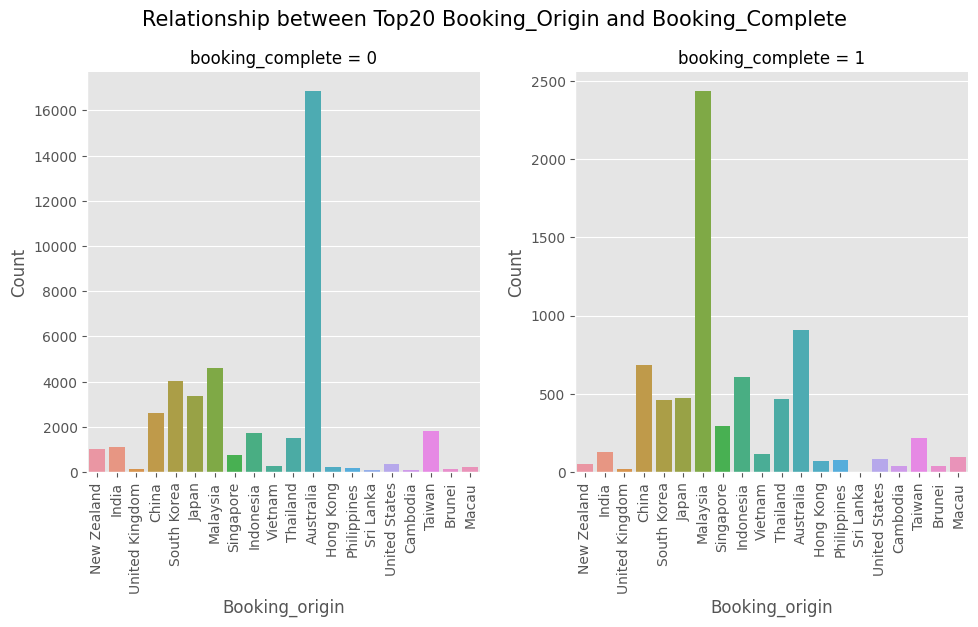

In [261]:
#visualize top20 booking_origin and booking_complete
g = sns.catplot(data=df5, x='booking_origin', col='booking_complete', kind='count', sharey=False)
g.fig.suptitle('Relationship between Top20 Booking_Origin and Booking_Complete', fontsize=15, y=1.05)
#g.set_titles('This is {col_name}', fontsize=12)
g.set(ylabel='Count', xlabel='Booking_origin')
g.set_xticklabels(rotation=90)

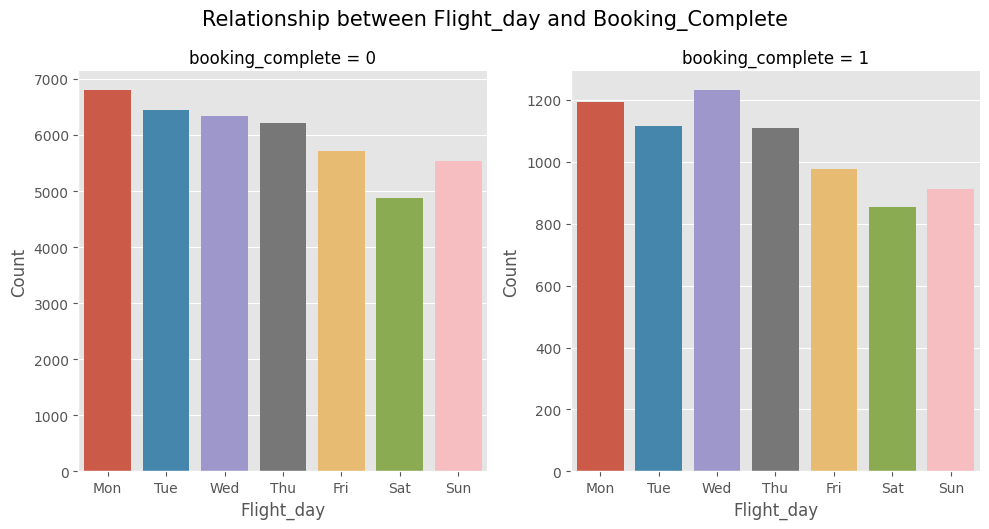

In [262]:
#visualize flight_day and booking_complete
day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
g = sns.catplot(data=df, x='flight_day', col='booking_complete', kind='count', sharey=False, order=day_order)
g.fig.suptitle('Relationship between Flight_day and Booking_Complete', fontsize=15, y=1.05)
#g.set_titles('This is {col_name}', fontsize=12)
g.set(ylabel='Count', xlabel='Flight_day')

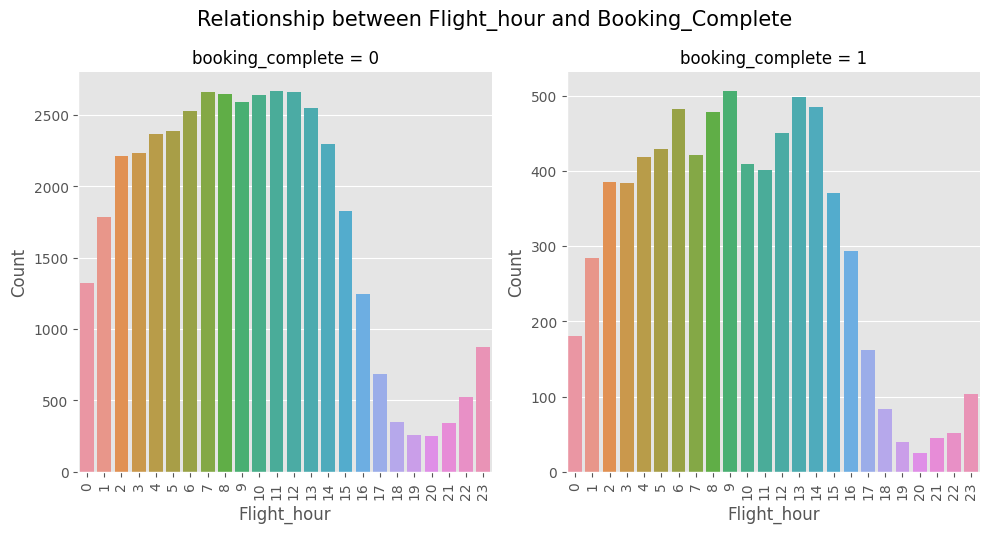

In [263]:
#visualize flight_hour and booking_complete
df['flight_hour'] = df['flight_hour'].astype('category')
g = sns.catplot(data=df, x='flight_hour', col='booking_complete', kind='count', sharey=False)
g.fig.suptitle('Relationship between Flight_hour and Booking_Complete', fontsize=15, y=1.05)
#g.set_titles('This is {col_name}', fontsize=12)
g.set(ylabel='Count', xlabel='Flight_hour')
g.set_xticklabels(rotation=90)

*Bivariate Analysis - Two Numerical Variabels*

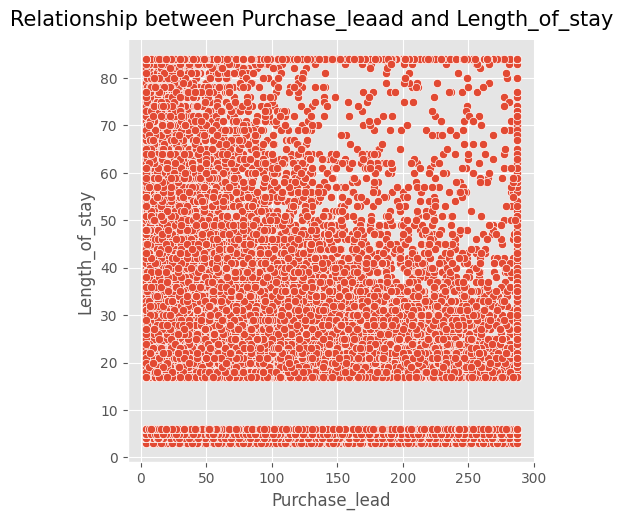

In [264]:
#visualize purchase_lead and length_of_stay
g = sns.relplot(data=df, x='purchase_lead', y='length_of_stay', kind='scatter')
g.fig.suptitle('Relationship between Purchase_leaad and Length_of_stay', fontsize=15, y=1.03)
g.set(ylabel='Length_of_stay', xlabel='Purchase_lead')


*Bivariate Analysis - A Numerical Variabels and A Categorical Variabels*

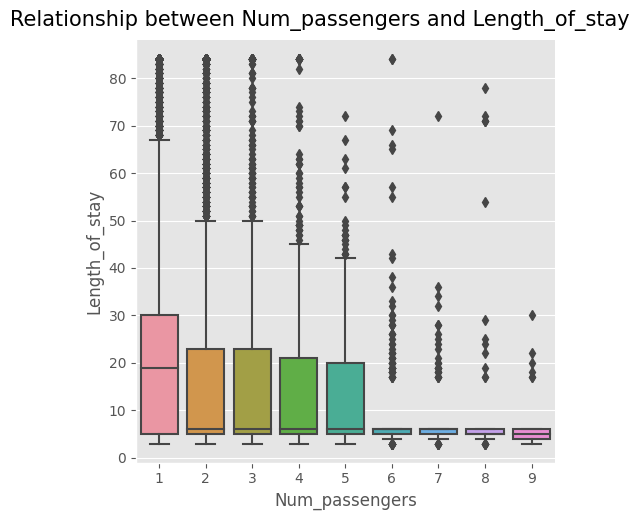

In [265]:
#visualize num_passengers and length_of_stay
g = sns.catplot(data=df, x='num_passengers', y='length_of_stay', kind='box')
g.fig.suptitle('Relationship between Num_passengers and Length_of_stay', fontsize=15, y=1.03)
g.set(ylabel='Length_of_stay', xlabel='Num_passengers')

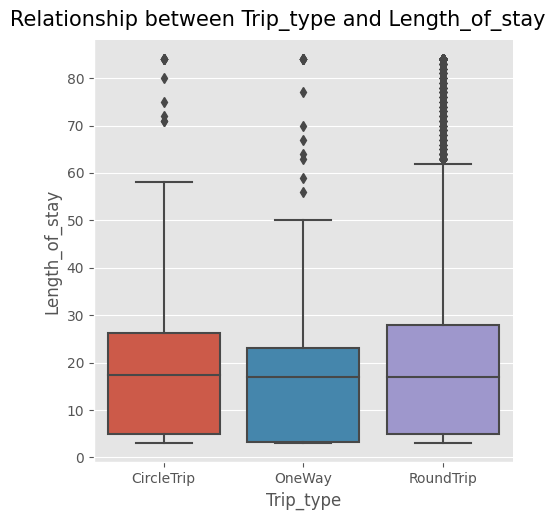

In [266]:
#visualize trip_type and length_of_stay
g = sns.catplot(data=df, x='trip_type', y='length_of_stay', kind='box')
g.fig.suptitle('Relationship between Trip_type and Length_of_stay', fontsize=15, y=1.03)
g.set(ylabel='Length_of_stay', xlabel='Trip_type')

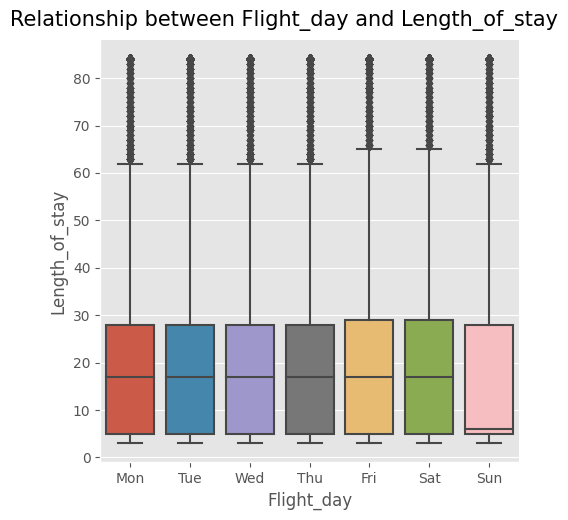

In [267]:
#visualize flight_day and length_of_stay
day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
g = sns.catplot(data=df, x='flight_day', y='length_of_stay', kind='box', order=day_order)
g.fig.suptitle('Relationship between Flight_day and Length_of_stay', fontsize=15, y=1.03)
g.set(ylabel='Length_of_stay', xlabel='Flight_day')

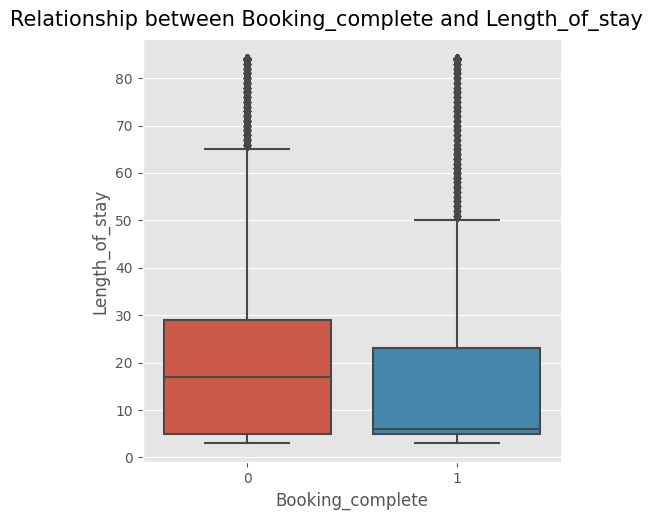

In [268]:
#visualize booking_complete and length_of_stay
g = sns.catplot(data=df, x='booking_complete', y='length_of_stay', kind='box')
g.fig.suptitle('Relationship between Booking_complete and Length_of_stay', fontsize=15, y=1.03)
g.set(ylabel='Length_of_stay', xlabel='Booking_complete')

In [269]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262.0,19.0,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112.0,20.0,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243.0,22.0,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96.0,31.0,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68.0,22.0,15,Wed,AKLDEL,India,1,0,1,5.52,0


## **2. Predictive Models**

In [270]:
#create df_test
df_test = df.copy(deep=True)

In [271]:
#checking outlier in num_passengers column
df_test.loc[check_outlier(df['num_passengers']),:]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
12,4,Internet,RoundTrip,265.0,24.0,19,Mon,AKLDEL,New Zealand,1,0,1,5.52,0
37,6,Internet,RoundTrip,20.0,22.0,3,Fri,AKLICN,South Korea,1,1,1,6.62,0
61,4,Internet,RoundTrip,128.0,21.0,9,Mon,AKLICN,New Zealand,1,1,0,6.62,0
63,4,Internet,RoundTrip,287.0,27.0,6,Sat,AKLICN,New Zealand,0,1,0,6.62,0
118,6,Internet,RoundTrip,172.0,28.0,0,Sat,AKLKUL,New Zealand,0,0,1,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49953,8,Internet,RoundTrip,287.0,6.0,17,Sat,PENTPE,Malaysia,1,1,1,4.67,1
49958,4,Mobile,RoundTrip,108.0,6.0,16,Mon,PENTPE,Malaysia,1,0,1,4.67,0
49960,5,Internet,RoundTrip,102.0,6.0,15,Thu,PENTPE,Malaysia,1,0,0,4.67,0
49976,4,Internet,RoundTrip,151.0,6.0,15,Tue,PENTPE,Malaysia,1,0,0,4.67,0


In [272]:
#removing outlier using capping method
capping_lower = df_test['num_passengers'].quantile(0.05)
capping_upper = df_test['num_passengers'].quantile(0.95)

df_test['num_passengers'] = np.where(df_test['num_passengers'] <= capping_lower, capping_lower,\
                               np.where(df_test['num_passengers'] >= capping_upper, capping_upper,\
                               df_test['num_passengers']))

In [273]:
#divide the route column into 2 values - the departure and the arrival to reduce the number of unique values
df_test['departure'] = df_test['route'].apply(lambda x: x[:3])
df_test['arrival'] = df_test['route'].apply(lambda x: x[3:])
df_test.drop('route', axis=1, inplace=True)
df_test.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,departure,arrival
0,2.0,Internet,RoundTrip,262.0,19.0,7,Sat,New Zealand,1,0,0,5.52,0,AKL,DEL
1,1.0,Internet,RoundTrip,112.0,20.0,3,Sat,New Zealand,0,0,0,5.52,0,AKL,DEL
2,2.0,Internet,RoundTrip,243.0,22.0,17,Wed,India,1,1,0,5.52,0,AKL,DEL
3,1.0,Internet,RoundTrip,96.0,31.0,4,Sat,New Zealand,0,0,1,5.52,0,AKL,DEL
4,2.0,Internet,RoundTrip,68.0,22.0,15,Wed,India,1,0,1,5.52,0,AKL,DEL


In [274]:
#encoding features
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

#using one-hot encoding with sales_channel, trip_type, flight_day
df_test = pd.get_dummies(df_test,columns=['sales_channel','trip_type','flight_day'])

#using label-encoding with booking origin, departure, arrival
df_test['booking_origin'] = label_encoder.fit_transform(df_test['booking_origin'])
df_test['departure'] = label_encoder.fit_transform(df_test['departure'])
df_test['arrival'] = label_encoder.fit_transform(df_test['arrival'])


In [275]:
#using log-transformation with length_of_stay
df_test['length_of_stay'] = np.log(df_test['length_of_stay'])

<Axes: >

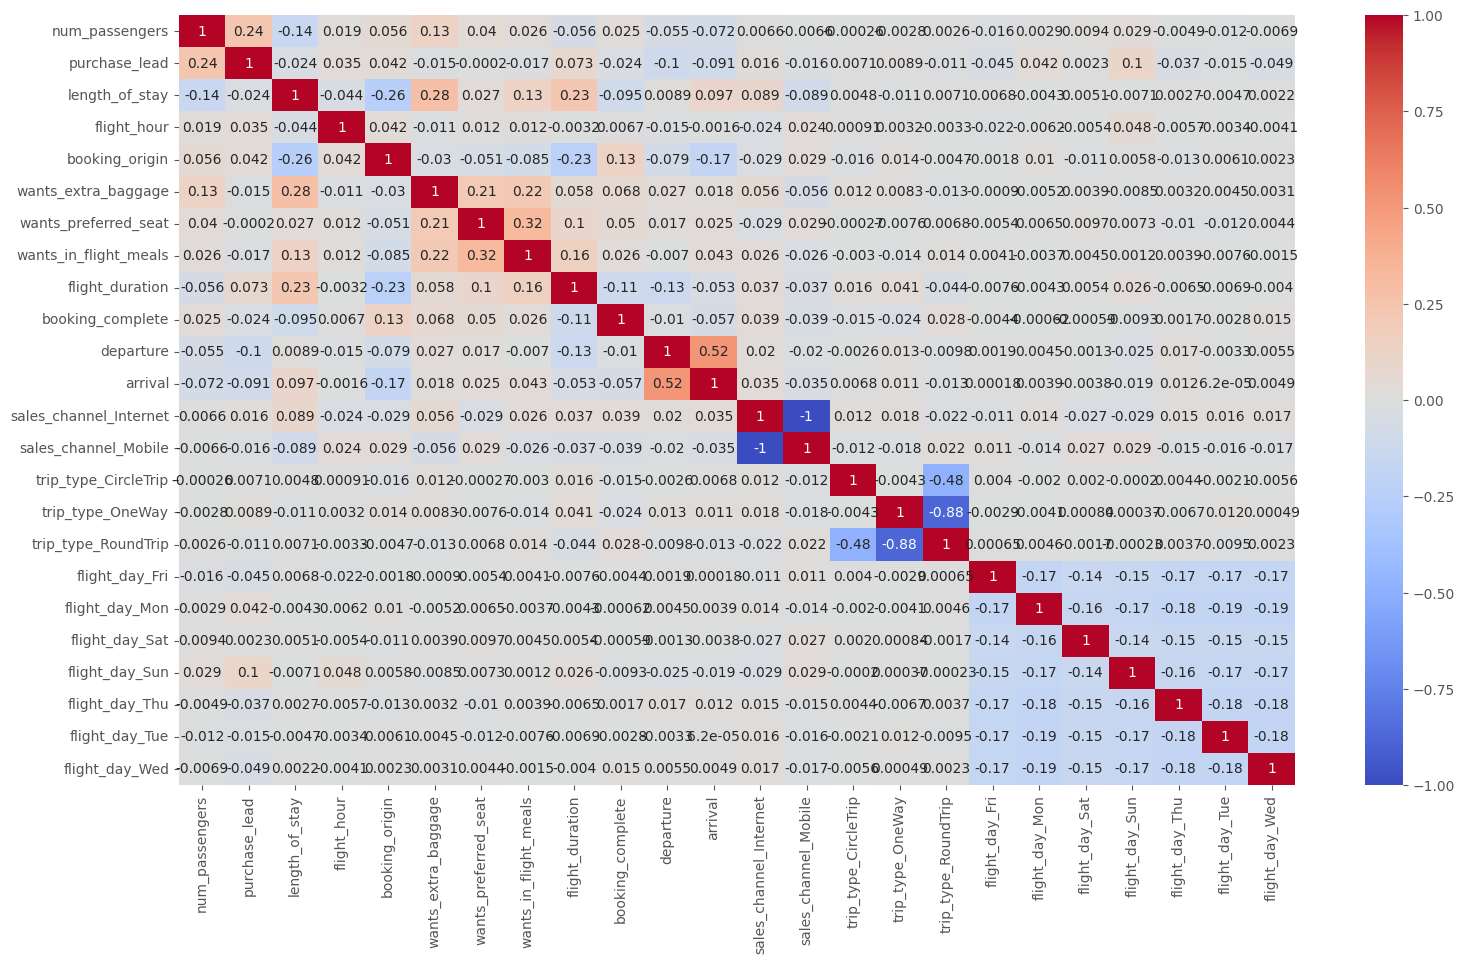

In [276]:
#create heatmap with all features
plt.figure(figsize=(18,10))
sns.heatmap(df_test.corr(), annot=True, cmap='coolwarm')

In [277]:
#relocate booking_complete in first column in dataframe
first_col = df_test.pop('booking_complete')
df_test.insert(0, 'booking_complete', first_col)
df_test.head()

,booking_complete,num_passengers,purchase_lead,length_of_stay,flight_hour,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,...,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,0,2.0,262.0,2.944439,7,60,1,0,0,5.52,...,False,False,True,False,False,True,False,False,False,False
1,0,1.0,112.0,2.995732,3,60,0,0,0,5.52,...,False,False,True,False,False,True,False,False,False,False
2,0,2.0,243.0,3.091042,17,35,1,1,0,5.52,...,False,False,True,False,False,False,False,False,False,True
3,0,1.0,96.0,3.433987,4,60,0,0,1,5.52,...,False,False,True,False,False,True,False,False,False,False
4,0,2.0,68.0,3.091042,15,35,1,0,1,5.52,...,False,False,True,False,False,False,False,False,False,True


In [278]:
y = df_test['booking_complete'].values
X = df_test.iloc[:, 1:].values

#handle imbalance data using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=24)
X_new, y_new = sm.fit_resample(X, y)

In [279]:
#split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=24)

In [280]:
#classifiation by LogisticRegression
from sklearn.linear_model import LogisticRegression
Reg = LogisticRegression()
Reg.fit(X_train, y_train)
y_pred1 = Reg.predict(X_test)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [281]:
Reg_score_train = Reg.score(X_train,y_train)
Reg_score_test = Reg.score(X_test,y_test)
Reg_score_train, Reg_score_test

(0.6356678204822154, 0.6324898543805204)

In [282]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63      8376
           1       0.63      0.64      0.64      8380

    accuracy                           0.63     16756
   macro avg       0.63      0.63      0.63     16756
weighted avg       0.63      0.63      0.63     16756



Text(0.5, 23.52222222222222, 'Dự báo')

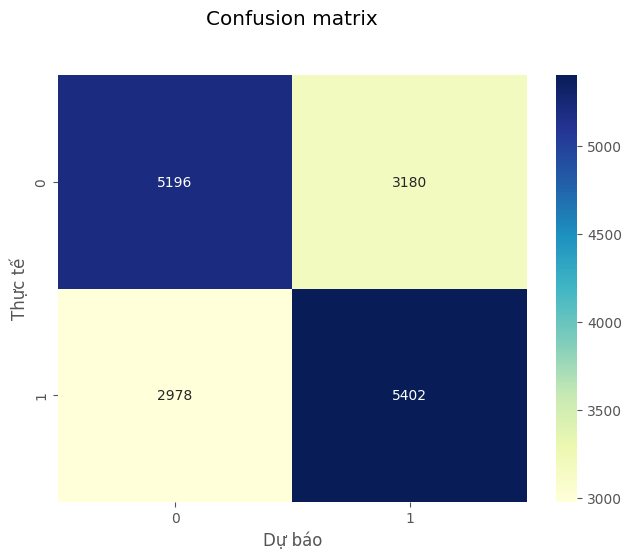

In [283]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred1)
cnf_matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [284]:
#classifiation by Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred2 = GNB.predict(X_test)

In [285]:
GNB_score_train =GNB.score(X_train,y_train)
GNB_score_test =GNB.score(X_test,y_test)
print(GNB_score_train)
print(GNB_score_test)

0.535151587491048
0.5375984721890666


In [286]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.70      0.13      0.22      8376
           1       0.52      0.94      0.67      8380

    accuracy                           0.54     16756
   macro avg       0.61      0.54      0.45     16756
weighted avg       0.61      0.54      0.45     16756



Text(0.5, 23.52222222222222, 'Dự báo')

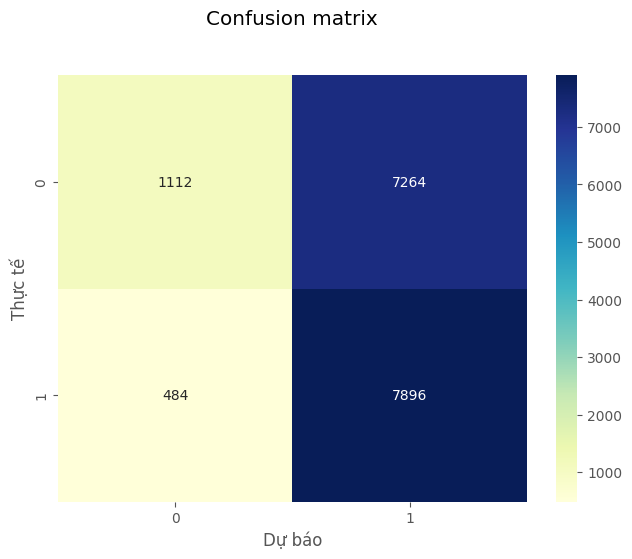

In [287]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred2)
cnf_matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [288]:
#classification by Decision Tree
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred3 = DT.predict(X_test)

In [289]:
DT_score_train = DT.score(X_train,y_train)
DT_score_test = DT.score(X_test,y_test)
print(DT_score_train)
print(DT_score_test)

0.9999253998567678
0.8572451659107185


In [290]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      8376
           1       0.85      0.87      0.86      8380

    accuracy                           0.86     16756
   macro avg       0.86      0.86      0.86     16756
weighted avg       0.86      0.86      0.86     16756



Text(0.5, 23.52222222222222, 'Dự báo')

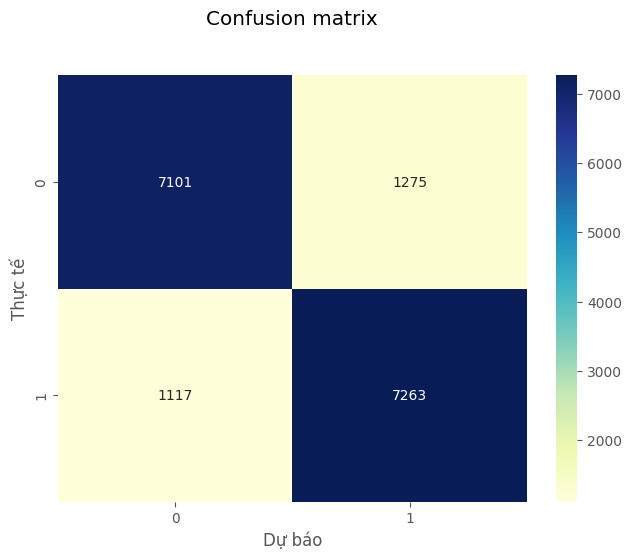

In [291]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred3)
cnf_matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [292]:
#classifier by RandomForest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred4 = RF.predict(X_test)

In [293]:
RF_score_train = RF.score(X_train, y_train)
RF_score_test = RF.score(X_test, y_test)
print(RF_score_train)
print(RF_score_test)

0.9999104798281213
0.9102411076629268


In [294]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8376
           1       0.97      0.84      0.90      8380

    accuracy                           0.91     16756
   macro avg       0.92      0.91      0.91     16756
weighted avg       0.92      0.91      0.91     16756



Text(0.5, 23.52222222222222, 'Dự báo')

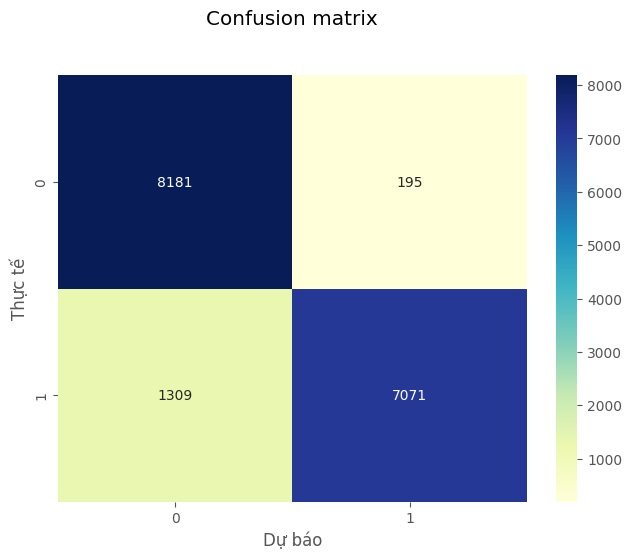

In [295]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred4)
cnf_matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [296]:
#classification by KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_pred5 = KNN.predict(X_test)

In [297]:
KNN_score_train = KNN.score(X_train, y_train)
KNN_score_test = KNN.score(X_test, y_test)
print(KNN_score_train)
print(KNN_score_test)

0.8724785151587491
0.8078897111482454


In [298]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.92      0.67      0.78      8376
           1       0.74      0.94      0.83      8380

    accuracy                           0.81     16756
   macro avg       0.83      0.81      0.80     16756
weighted avg       0.83      0.81      0.80     16756



Text(0.5, 23.52222222222222, 'Dự báo')

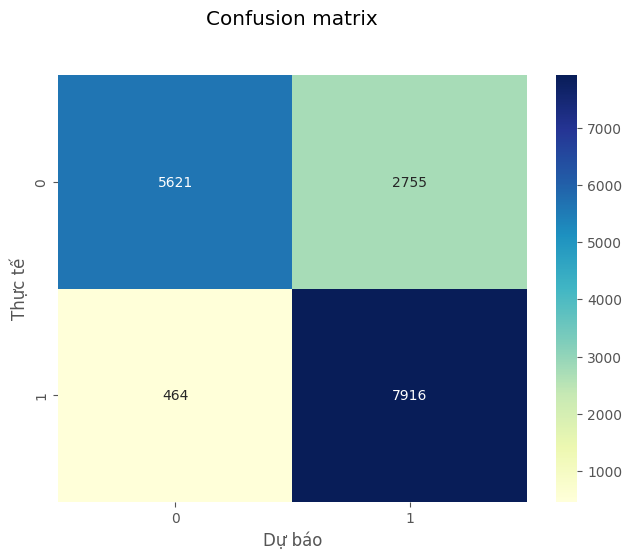

In [299]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred5)
cnf_matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [300]:
#clasification by XGBoost
import xgboost as xgb
Xg = xgb.XGBClassifier()
Xg.fit(X_train, y_train)
y_pred6 = Xg.predict(X_test)

In [301]:
Xg_score_train = Xg.score(X_train, y_train)
Xg_score_test = Xg.score(X_test, y_test)
print(Xg_score_train)
print(Xg_score_test)

0.927727381236572
0.909166865600382


In [302]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      8376
           1       0.97      0.84      0.90      8380

    accuracy                           0.91     16756
   macro avg       0.92      0.91      0.91     16756
weighted avg       0.92      0.91      0.91     16756



Text(0.5, 23.52222222222222, 'Dự báo')

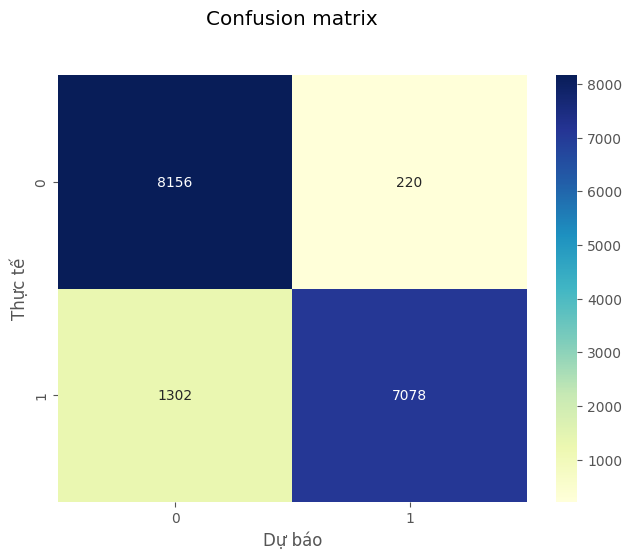

In [303]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred6)
cnf_matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [304]:
#classification by LightGBM
import lightgbm as lgb
Lig = lgb.LGBMClassifier()
Lig.fit(X_train, y_train)
y_pred7 = Lig.predict(X_test)

In [305]:
Lig_score_train = Lig.score(X_train, y_train)
Lig_score_test = Lig.score(X_test, y_test)
print(Lig_score_train)
print(Lig_score_test)

0.9127476724755311
0.9082716638815946


In [306]:
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      8376
           1       0.98      0.83      0.90      8380

    accuracy                           0.91     16756
   macro avg       0.92      0.91      0.91     16756
weighted avg       0.92      0.91      0.91     16756



Text(0.5, 23.52222222222222, 'Dự báo')

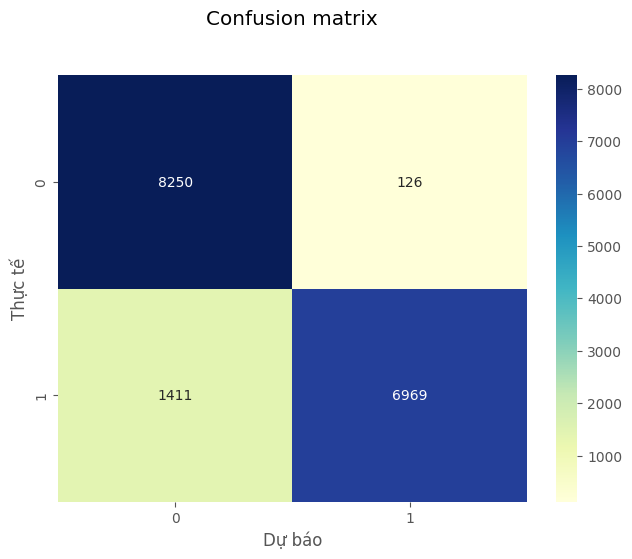

In [307]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred7)
cnf_matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [308]:
#hyperparameter tunning with RandomForest Model
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV


#hps = {"n_estimators" : [100, 250, 500], 
#       "max_features" : ['sqrt', 'log2', None], 
#       "max_depth" : [68, 10, 12], 
#       "min_samples_split" : [2, 4, 6, 8],
#       "class_weight" : ['balanced_subsample', 'balanced', None, {0: 0.5, 1: 2.8}],
#       "criterion": ['gini', 'entropy', 'log_loss']}
#grids = RandomizedSearchCV(RF, hps)
#grids.fit(X_train, y_train)

In [309]:
import datetime
models = [
    LogisticRegression(),
    GaussianNB(),
    tree.DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    xgb.XGBClassifier(),
    lgb.LGBMClassifier()
]
entries = []
for model in models:
    scores_train = []
    scores_test = []
    times = []
    abs_scores = []

    t1 = datetime.datetime.now()
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    t2 = datetime.datetime.now()
    d = round((t2-t1).seconds,1)
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    abs_score = abs(score_train - score_test)

    scores_train.append(score_train)
    scores_test.append(score_test)
    abs_scores.append(abs_score)
    times.append(d)

    entries.append([model_name, scores_train, scores_test, abs_scores, times])

cv_df = pd.DataFrame(entries, columns = ['model_name', 'score_train', 'score_test', 'abs_score', 'times'])

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [310]:
cv_df

,model_name,score_train,score_test,abs_score,times
0,LogisticRegression,[0.6356678204822154],[0.6324898543805204],[0.0031779661016949623],[1]
1,GaussianNB,[0.535151587491048],[0.5375984721890666],[0.002446884698018681],[0]
2,DecisionTreeClassifier,[0.9999253998567678],[0.8575435664836476],[0.14238183337312016],[1]
3,RandomForestClassifier,[0.9999104798281213],[0.9100023872045835],[0.08990809262353783],[33]
4,KNeighborsClassifier,[0.8724785151587491],[0.8078897111482454],[0.06458880401050371],[0]
5,XGBClassifier,[0.927727381236572],[0.909166865600382],[0.01856051563618999],[5]
6,LGBMClassifier,[0.9127476724755311],[0.9082716638815946],[0.004476008593936487],[0]


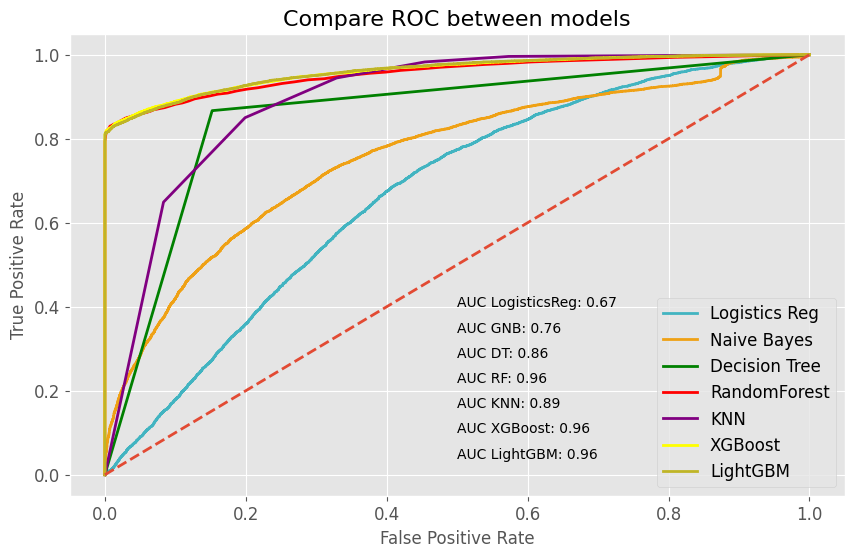

In [361]:
#ploting ROC_AUC for models on test set
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(10,6))
#ploting ROC of Logistics Regression
y_prob1 = Reg.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob1)
plt.plot(false_positive_rate, true_positive_rate, linewidth=2, color='#42b4c1', label='Logistics Reg')
plt.text(0.5,0.4,'AUC LogisticsReg: {:.2f}'.format(roc_auc_score(y_test,y_prob1)),size= 10)

#ploting ROC of Naive Bayes
y_prob2 = GNB.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob2)
plt.plot(false_positive_rate, true_positive_rate, linewidth=2, color='#efa115', label='Naive Bayes')
plt.text(0.5,0.34,'AUC GNB: {:.2f}'.format(roc_auc_score(y_test,y_prob2)),size= 10)

#ploting ROC of Decision Tree
y_prob3 = DT.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob3)
plt.plot(false_positive_rate, true_positive_rate, linewidth=2, color='green', label='Decision Tree')
plt.text(0.5,0.28,'AUC DT: {:.2f}'.format(roc_auc_score(y_test,y_prob3)),size= 10)

#ploting ROC of RandomForest
y_prob4 = RF.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob4)
plt.plot(false_positive_rate, true_positive_rate, linewidth=2, color='red', label='RandomForest')
plt.text(0.5,0.22,'AUC RF: {:.2f}'.format(roc_auc_score(y_test,y_prob4)),size= 10)

#ploting ROC of KNN
y_prob5 = KNN.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob5)
plt.plot(false_positive_rate, true_positive_rate, linewidth=2, color='purple',label='KNN')
plt.text(0.5,0.16,'AUC KNN: {:.2f}'.format(roc_auc_score(y_test,y_prob5)),size= 10)

#ploting ROC of XGBoost
y_prob6 = Xg.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob6)
plt.plot(false_positive_rate, true_positive_rate, linewidth=2, color='yellow',label='XGBoost')
plt.text(0.5,0.1,'AUC XGBoost: {:.2f}'.format(roc_auc_score(y_test,y_prob6)),size= 10)

#ploting ROC of LightGBM
y_prob7 = Lig.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob7)
plt.plot(false_positive_rate, true_positive_rate, linewidth=2, color='#bfb527',label='LightGBM')
plt.text(0.5,0.04,'AUC LightGBM: {:.2f}'.format(roc_auc_score(y_test,y_prob7)),size= 10)

plt.plot([0,1], ls='--', linewidth=2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Compare ROC between models', fontsize=16)
plt.legend(prop={'size':12}, loc='lower right')

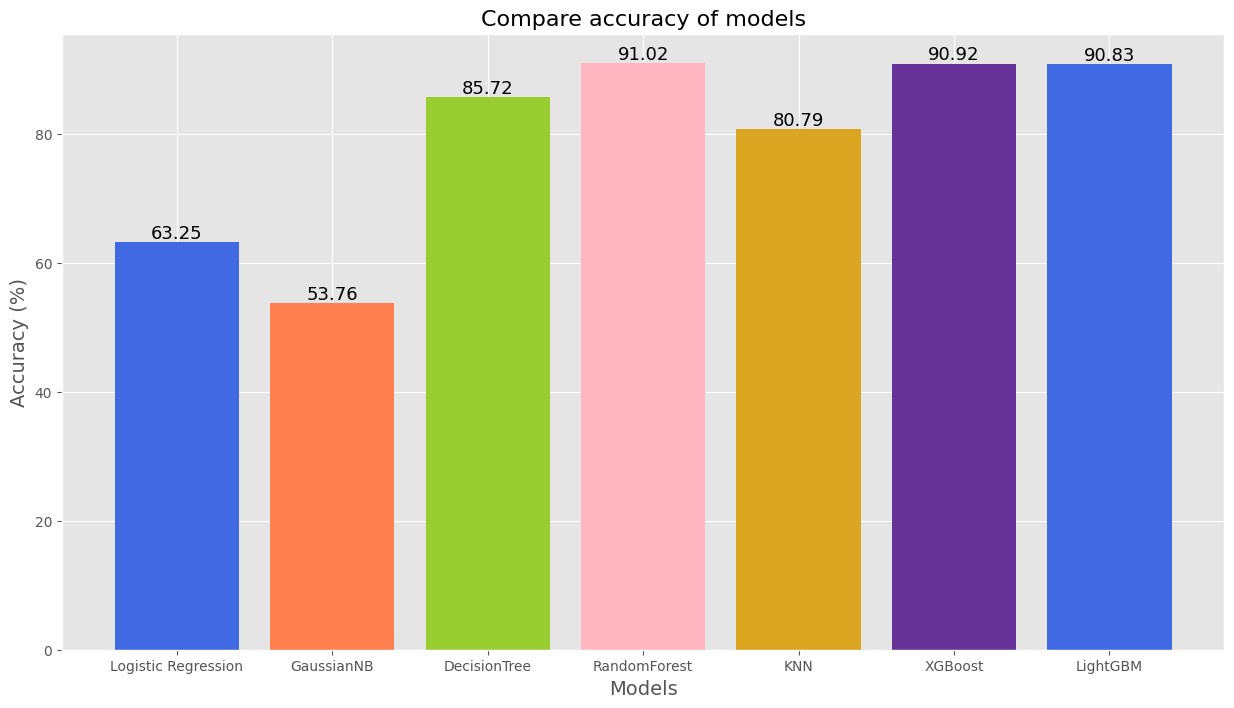

In [312]:
accuracy_score = [Reg_score_test, GNB_score_test, DT_score_test, RF_score_test, KNN_score_test,\
                  Xg_score_test, Lig_score_test]
models = ['Logistic Regression', 'GaussianNB', 'DecisionTree',\
          'RandomForest', 'KNN', 'XGBoost', 'LightGBM']
accuracy_score = [round(x*100,2) for x in accuracy_score]

plt.figure(figsize=(15,8))
palette = ['royalblue','coral','yellowgreen','lightpink','goldenrod','rebeccapurple']
plt.bar(models,accuracy_score, color = palette)

#add text label to the plot
for i, v in enumerate(accuracy_score):
    plt.text(x=i, y=v+0.6, s=str(v), ha='center', fontsize=13)

plt.xlabel("Models", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.title("Compare accuracy of models", fontsize=16)
plt.show()

Text(0.5, 1.0, 'Logistics_Regression')

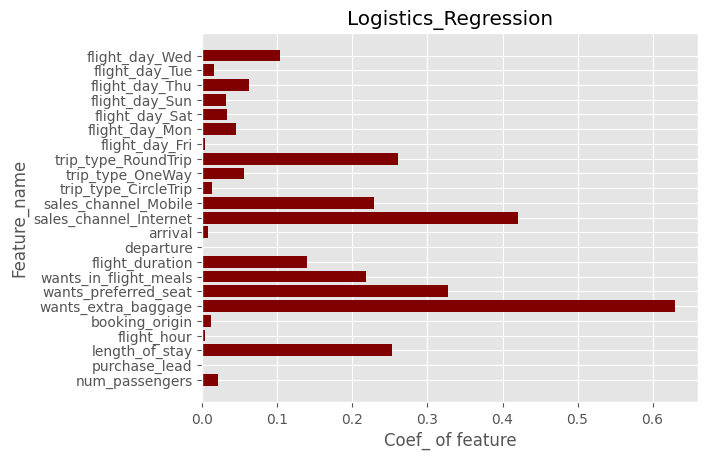

In [345]:
X = df_test.drop('booking_complete', axis=1)
features = X.columns

#coefficient of features in LogisticsRegression
importances = abs(Reg.coef_)[0]
feature_dict_log = dict(zip(features, importances))

plt.barh(list(feature_dict_log.keys()), list(feature_dict_log.values()), color='maroon', align='center')
plt.xlabel('Coef_ of feature')
plt.ylabel('Feature_name')
plt.title('Logistics_Regression')

Text(0.5, 1.0, 'Feature importance for a DecisionTree Model')

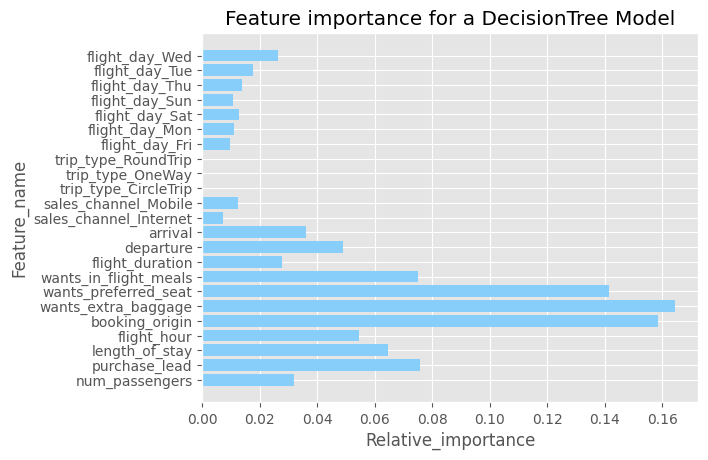

In [353]:
#feature importance of DecisionTree Model
feature_dict_DT = dict(zip(features, DT.feature_importances_))

plt.barh(list(feature_dict_DT.keys()), list(feature_dict_DT.values()), color='lightskyblue', align='center')
plt.xlabel('Relative_importance')
plt.ylabel('Feature_name')
plt.title('Feature importance for a DecisionTree Model')

Text(0.5, 1.0, 'Feature importance for a RandomForest Model')

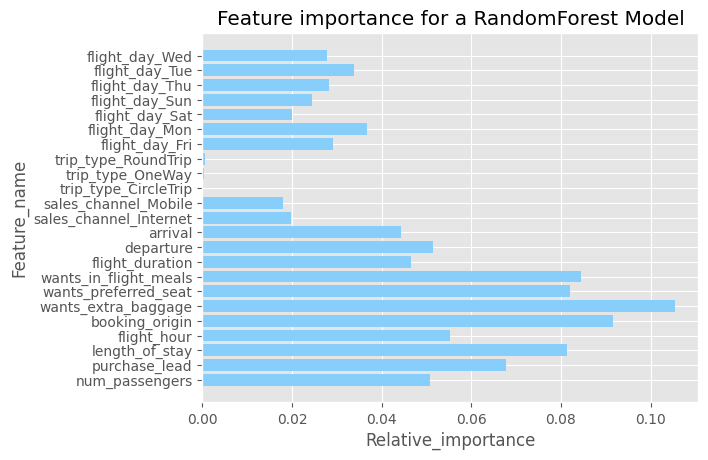

In [346]:
#feature importance of RandomForest Model
feature_dict_RF = dict(zip(features, RF.feature_importances_))

plt.barh(list(feature_dict_RF.keys()), list(feature_dict_RF.values()), color='lightskyblue', align='center')
plt.xlabel('Relative_importance')
plt.ylabel('Feature_name')
plt.title('Feature importance for a RandomForest Model')

Text(0.5, 1.0, 'Feature importance for a XGBoost Model')

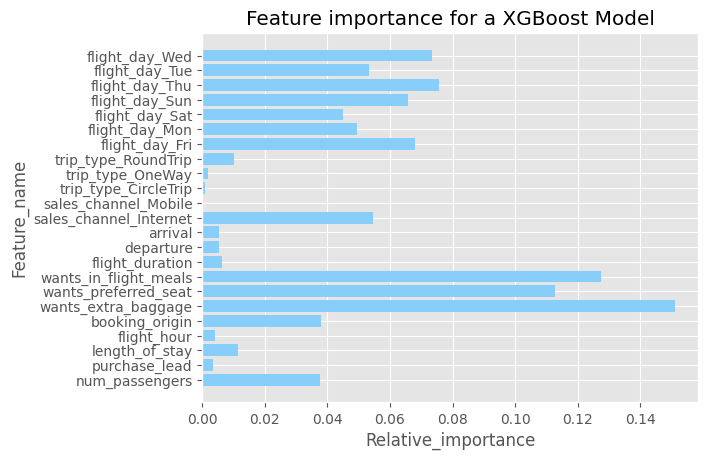

In [360]:
#feature importance of XGBoost Model
feature_dict_Xg = dict(zip(features, Xg.feature_importances_))

plt.barh(list(feature_dict_Xg.keys()), list(feature_dict_Xg.values()), color='lightskyblue', align='center')
plt.xlabel('Relative_importance')
plt.ylabel('Feature_name')
plt.title('Feature importance for a XGBoost Model')